## Artificial Neural Network model

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Split data into training and testing sets
#### 3. Run an ANN model on the unscaled data
#### 4. Scaling the data
#### 5. Run an ANN model on the scaled data
#### 6. Confusion matrix (Training data)
#### 7. Confusion matrix (Testing data)

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine Learning with Python'

In [3]:
climate = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [4]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
climate.shape

(22950, 170)

In [6]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
pleasantweather.shape

(22950, 16)

In [9]:
columns_to_drop = [col for col in climate.columns if any(city in col for city in ['GDANSK', 'ROMA', 'TOURS']) or col in ['Unnamed: 0', 'DATE']]

In [10]:
climate = climate.drop(columns=columns_to_drop)

In [11]:
climate.shape

(22950, 148)

## 2. Split data into training and testing sets

In [12]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate
y = pleasantweather.drop(['DATE'], axis=1)

In [13]:
print(X.shape)
print(y.shape)

(22950, 148)
(22950, 15)


In [14]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


In [16]:
X_train[:10]

,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,6,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,1,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,1,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,2,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,5,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,11,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,1,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,5,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,7,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


## 3. Run an ANN model on the unscaled data

In [39]:
#Create the ANN on the unscaled data
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [40]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6383918196607018
0.5733705123736493


## 4. Scaling the data

In [19]:
#Scaling the data
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:10])

[[-0.14644095 -1.41107749 -0.03095027 ...  1.45475014  1.57581674
   1.16512065]
 [-1.59937014  1.08186228 -0.58789342 ... -0.0139084  -0.0077553
  -0.00981651]
 [-1.59937014  0.66637232 -0.866365   ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [-1.59937014  1.08186228 -0.03095027 ... -0.07385364  0.48369809
  -0.61161358]
 [-0.43702678  0.66637232 -0.03095027 ...  0.55557144  0.42909216
   0.64929458]
 [ 0.14414489 -1.41107749 -1.14483657 ... -0.0139084  -0.0077553
  -0.00981651]]


## 5. Run an ANN model on the scaled data

In [51]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.

model_scaled = MLPClassifier(hidden_layer_sizes=(70,60,60), max_iter=1000, tol=0.0001)

#Fit the data to the model
model_scaled.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000)

In [52]:
# Predict the model

y_pred_test_scaled = model_scaled.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test_scaled))

y_pred_train_scaled = model_scaled.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred_train_scaled))

0.6158940397350994
0.8363351150360214


### Conclusion:

#### Scaling the data did not significantly improve the model's performance. The difference in accuracy between scaled and unscaled data is minimal, with the unscaled data performing slightly better on the test set.


## 6. Confusion matrix (Training data)

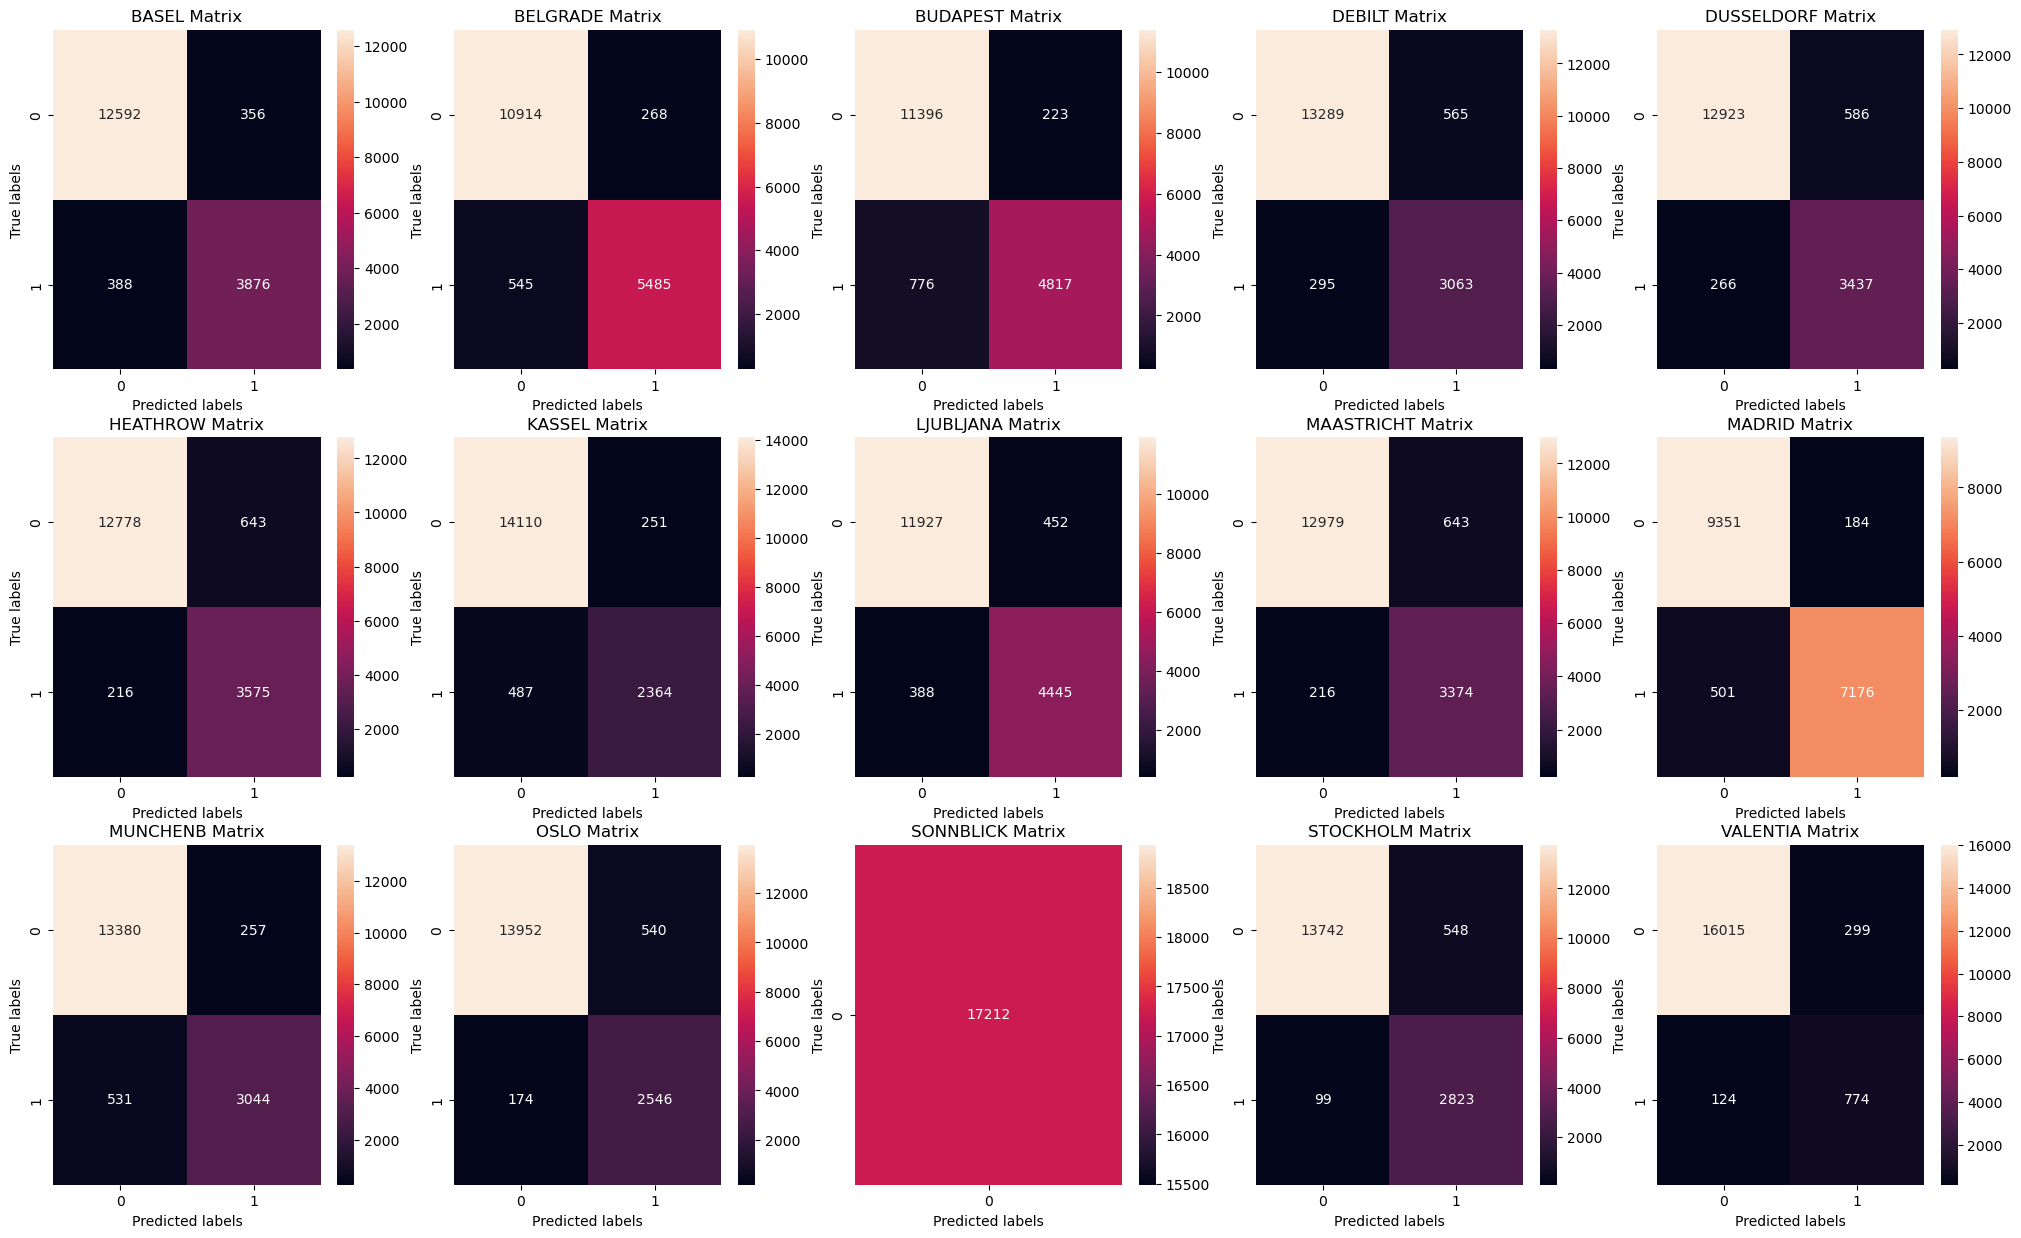

In [53]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.savefig('confusion_matrices_train.png')

## 7. Confusion matrix (Testing data)

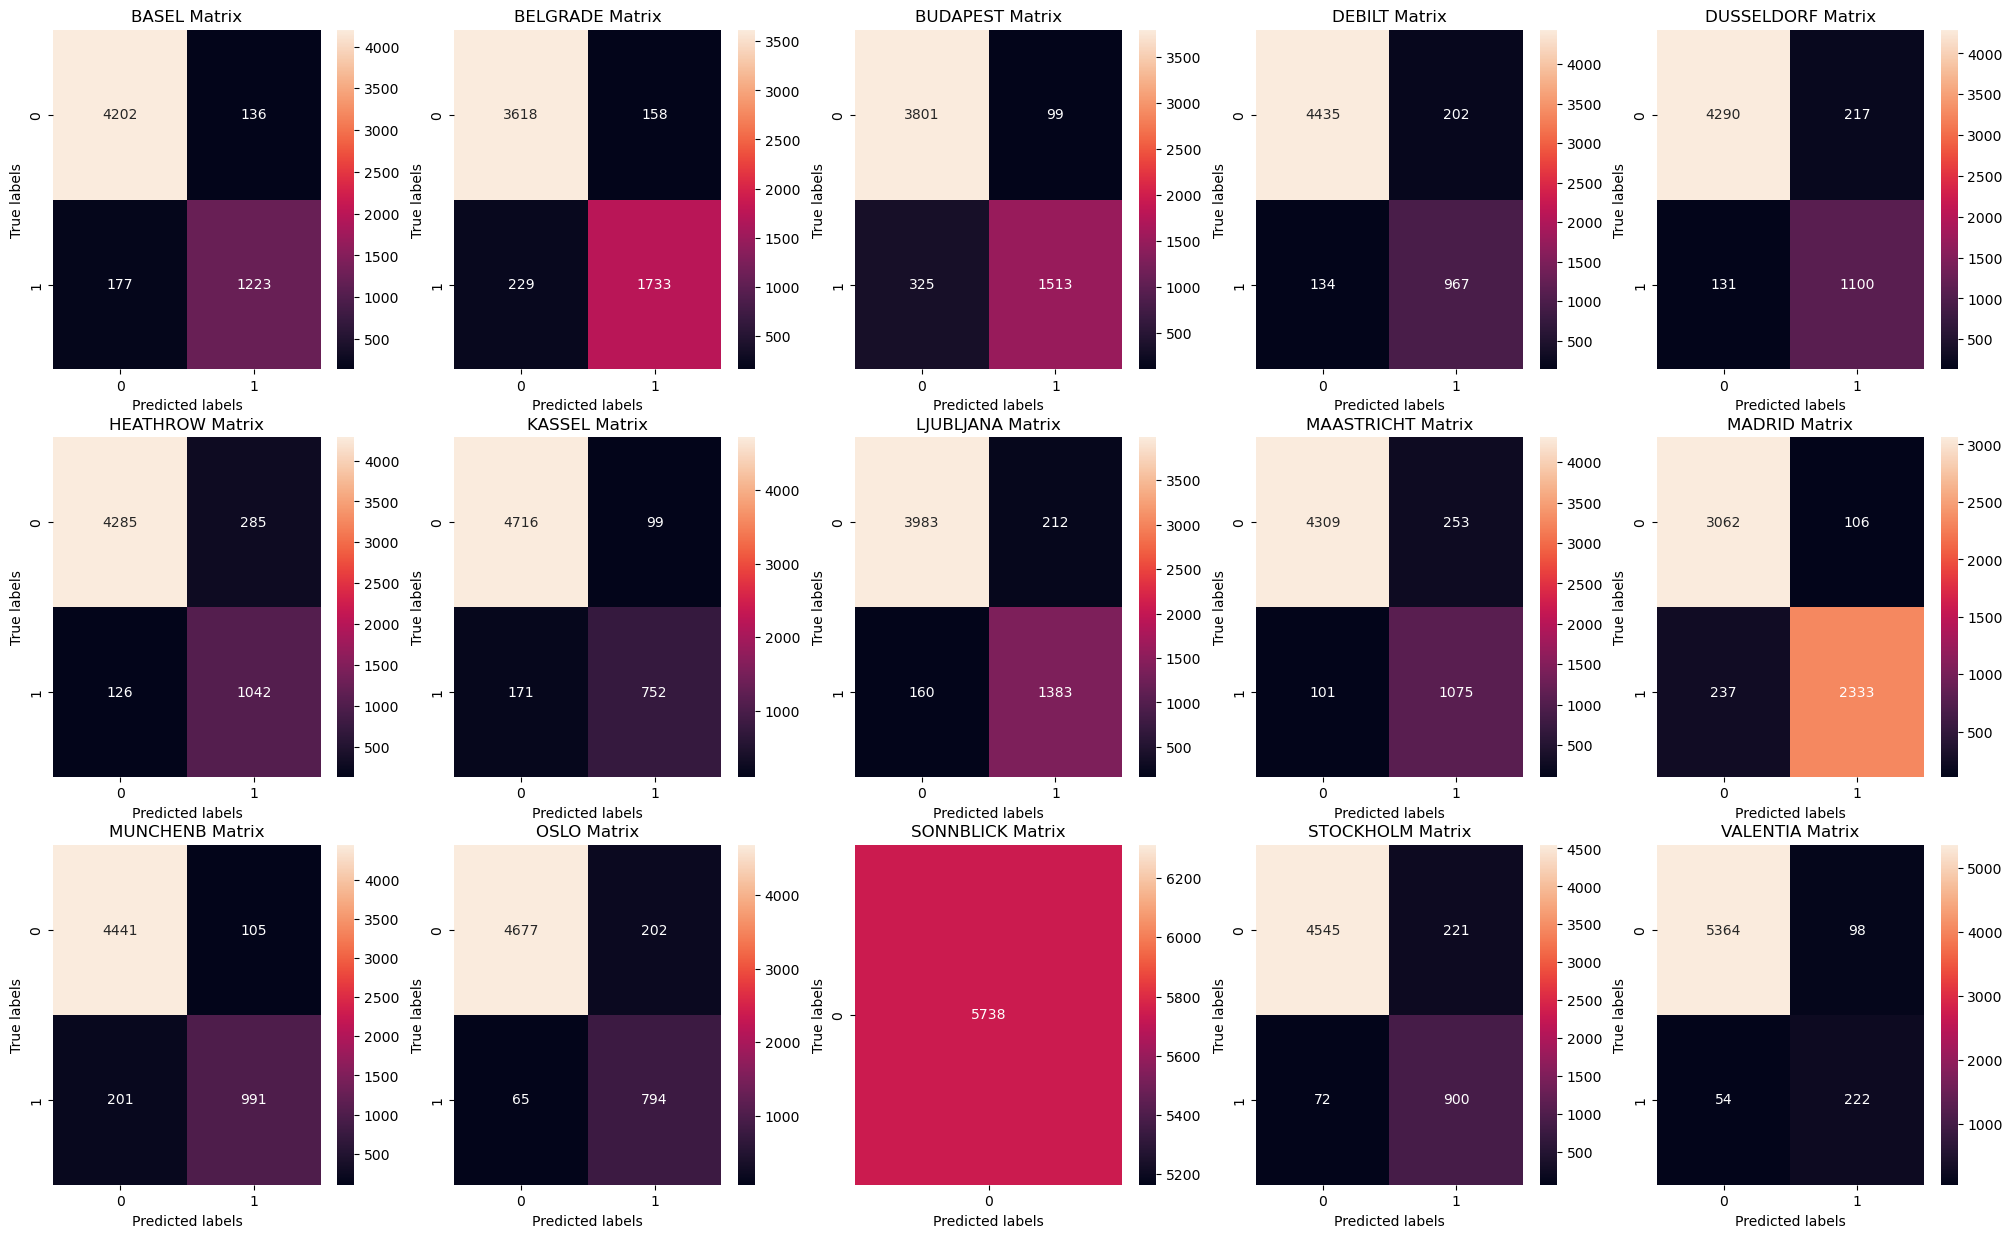

In [54]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
plt.savefig('confusion_matrices_test.png')